In [1]:
from utils import *

In [2]:
file1 = 'MnCO3.dat'
file2 = 'Mn5O8.dat'
file3 = 'MnO2-2.dat'
data = read_and_process_dat_file(file1)
reference_MnCO3, reference_Mn2O3 = define_references(data)
reference_Mn5O8 = Reference(read_and_process_dat_file(file2)[:, 1], 'Mn5O8')
reference_MnO2 = Reference(read_and_process_dat_file(file3)[:, 1], 'MnO2')
references = [reference_MnCO3, reference_MnO2, reference_Mn2O3, reference_Mn5O8]

D:\software\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[ 6.54839977e+03 -1.25487796e+04  6.55316564e+03  1.00000000e+00
 -2.22992343e-03  6.55775364e+03  8.55257697e-01  1.15550578e-03]
[ 6.55828294e+03 -1.37122351e+04  6.56110558e+03  1.00000000e+00
 -3.46599907e-04  6.56269310e+03  9.86136004e-01  8.66499767e-04]
[ 6.54945898e+03 -1.25884700e+04  6.55987073e+03  1.00000000e+00
 -7.28587762e-04  6.56727843e+03  9.48088122e-01  2.50452043e-04]
[ 6.54787014e+03 -1.25771001e+04  6.55987073e+03  1.00000000e+00
 -8.23267937e-04  6.56692576e+03  8.70270305e-01  2.16649457e-04]


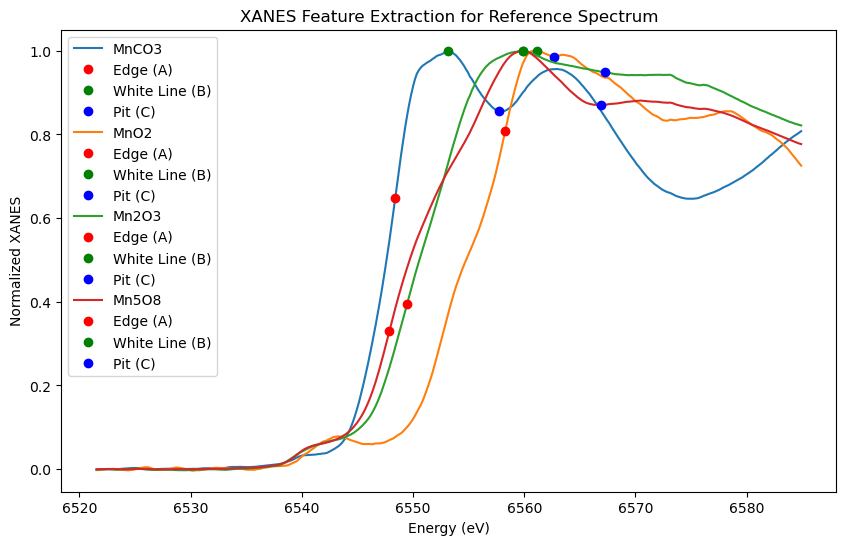

In [3]:
plt.figure(figsize=(10, 6))

energy = data[:, 0]

for reference in references:
    intensity = reference.data
    features = extract_xanes_features(energy, intensity)
    print(features)
    # Plot the spectrum with extracted features
    
    plt.plot(energy, intensity, label=reference.name)
    plt.plot(features[0], intensity[np.argmin(np.abs(energy - features[0]))], 'ro', label='Edge (A)')
    plt.plot(features[2], features[3], 'go', label='White Line (B)')
    plt.plot(features[5], features[6], 'bo', label='Pit (C)')

plt.xlabel('Energy (eV)')
plt.ylabel('Normalized XANES')
plt.legend()
plt.title('XANES Feature Extraction for Reference Spectrum')
plt.show()